In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import numpy as np


import scipy.optimize as optimization
from scipy import stats
from scipy.stats import norm
import matplotlib.dates as mdates

from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates

from IPython.display import HTML
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import datetime
# from datetime import datetime

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [2]:
#Read in data
infile_7 = 'data/7-6-2021'
infile_8 = 'data/8-6-2021'

indata_7 = open(infile_7)
indata_8 = open(infile_8)

p_det = []
p_low = []
p_high = []
time_stamp = []
unix_time = []
count = 0
flowrate = []
df = []
tijd = []
temp_15 = []

for line in indata_7:
    
    aa = line.split()
    a  = [ahelp.replace(',','.') for ahelp in aa] 
    df.append(a)
    
    if len(a) == 43: # I had to change this value because now we also print the GCF
        
        p_det.append(float(a[24]))
        p_low.append(float(a[25]))
        p_high.append(float(a[26]))
        flowrate.append(float(a[27]))
#         temp_15.append(float[a[16]])

        tijd.append(a[1])
        a1 = a[0].split('-')
        a2 = a[1].split(':')

        time = datetime.datetime(int(a1[2]),int(a1[1]),int(a1[0]),
                                 int(a2[0]),int(a2[1]),int(a2[2])).timestamp()
        
        if count == 0: start_time = time
        time_stamp.append(time-start_time)
        unix_time.append(time)
        count = count +1

#print(tijd)

p_det2 = []
p_low2 = []
p_high2 = []
time_stamp2 = []
unix_time2 = []
count2 = 0
flowrate2 = []
df2 = []
tijd2 = []
temp_15_2 = []

for line in indata_8:
    
    aa2 = line.split()
    a_  = [ahelp2.replace(',','.') for ahelp2 in aa2] 
    df2.append(a_)
    
    if len(a_) == 43: # I had to change this value because now we also print the GCF
        
        p_det2.append(float(a_[24]))
        p_low2.append(float(a_[25]))
        p_high2.append(float(a_[26]))
        flowrate2.append(float(a_[27]))
#         temp_15.append(float[a[16]])

        tijd2.append(a_[1])
        a1_ = a_[0].split('-')
        a2_ = a_[1].split(':')

        time2 = datetime.datetime(int(a1_[2]),int(a1_[1]),int(a1_[0]),
                                 int(a2_[0]),int(a2_[1]),int(a2_[2])).timestamp()
        
        if count2 == 0: start_time2 = time2
        time_stamp2.append(time2-start_time2)
        unix_time2.append(time2)
        count2 = count2 +1
#print(tijd)

In [3]:
# HOURS OF MEASUREMENT LIST
#---------------------------------------------------------------------------------------------------------------------------------

from datetime import datetime

time_list = []
for x in unix_time:
    dt_object = datetime.fromtimestamp(x)
    #print(dt_object)
    time_list.append(dt_object)
#print(time_list)

time_list2 = []
for x in unix_time2:
    dt_object2 = datetime.fromtimestamp(x)
    #print(dt_object)
    time_list2.append(dt_object2)
#print(time_list)

time_list3 = []
for x in unix_time3:
    dt_object3 = datetime.fromtimestamp(x)
    #print(dt_object)
    time_list3.append(dt_object3)
#print(time_list)

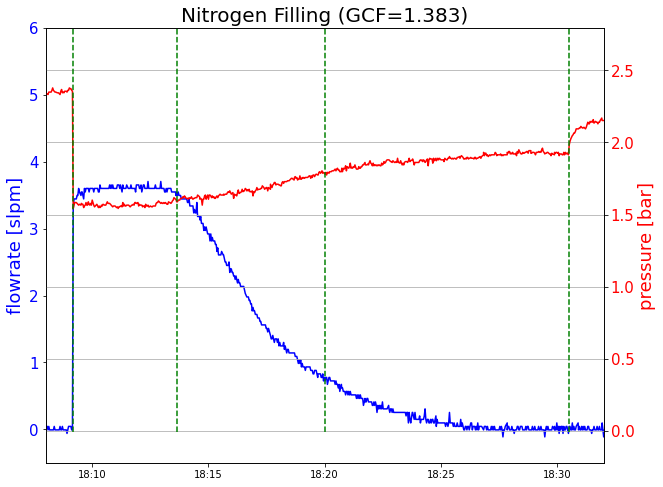

In [4]:
import datetime as dt

figure, ax = plt.subplots(figsize=(10, 8))

plt.plot(time_list, flowrate, color='blue')

#myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)

# Set X range. Using left and right variables makes it easy to change the range.
leftNi_ = dt.datetime(2021, 6, 7, 18, 8)
rightNi_ = dt.datetime(2021, 6, 7, 18, 32)

plt.gca().set_xbound(leftNi_, rightNi_)
plt.ylim(-0.5,6)

ax.set_ylabel('flowrate [slpm]', color='blue', fontsize=18) 
plt.yticks(fontsize = 15, color='blue')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('pressure [bar]', color='red', fontsize=18)  # we already handled the x-label with ax1
ax2.plot(time_list, p_low, color='red')
myFmt = mdates.DateFormatter('%H:%M')
ax2.xaxis.set_major_formatter(myFmt)
plt.gca().set_xbound(leftNi_, rightNi_)
plt.yticks(fontsize = 15, color='red')

x_00 = dt.datetime(2021, 6, 7, 18, 9,10)
x_11 = dt.datetime(2021, 6, 7, 18, 13,40)
x_22 = dt.datetime(2021, 6, 7, 18, 20)
x_33 = dt.datetime(2021, 6, 7, 18, 30,30)

plt.axvline(x_00, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')
plt.axvline(x_11, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')
plt.axvline(x_22, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')
plt.axvline(x_33, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')

plt.xlabel('time [s]',fontsize=18)
#plt.legend(loc='upper right')

plt.title('Nitrogen Filling (GCF=1.383)', fontsize = 20)

plt.grid()
#plt.savefig("N2_filling_1.383.png")

plt.show()

In [5]:
################################################################################################################################
#Integrated flow 
################################################################################################################################
def integrated_flow(x_values, y_values, lb, ub): 
    
    integrated_flow = []
    #print(f'left bound is {lb}, right bound is {ub}')
    #dt = ub.timestamp() - lb.timestamp()
    #print(dt)
    
    for count, value in enumerate(y_values): 
        #print(count,value)
        if x_values[count] >= lb and x_values[count] <= ub: 
            integrated_flow.append(y_values[count])
    
    res = (sum((integrated_flow)*2)/60)
    print(f'Integrated flow: {res} SL')
    
    return res

################################################################################################################################
#Mean flow 
################################################################################################################################

def mean_fl(x_values, y_values, lb, ub):
    
    mean_flow = []

    #print(f'left bound is {lb}, right bound is {ub}')
    #dt = ub.timestamp() - lb.timestamp()
    #print(dt)
    
    for count, value in enumerate(y_values): 
        #print(count,value)
        if x_values[count] >= lb and x_values[count] <= ub: 
            mean_flow.append(y_values[count])
            
    num_values_flow = len(mean_flow)
    res = (sum(mean_flow)/num_values_flow)
    #print(f'Mean flow: {res} slpm')

    return res

################################################################################################################################
#Delta p Calculation
################################################################################################################################
p_start_bottle = 0 # the bottle is in vacuum when we start

def delta_p(x_values, y_values, lb, ub, p_values): 
    
    integrated_flow = []
    p_sum = []
    #print(f'left bound is {lb}, right bound is {ub}')
    dt = ub.timestamp() - lb.timestamp()
    #print(dt)
    
    for count, value in enumerate(y_values): 
        #print(count,value)
        if x_values[count] >= lb and x_values[count] <= ub:             
            integrated_flow.append(y_values[count])
            p_sum.append(p_values[count])
    
    #p_max = p_sum[0]
    p_min = p_sum[-1]
    delta_p = p_min - p_start_bottle
    p_res = [p_min, delta_p]
    #print(f'P supply = {p_max} bar')
    print(f'P end = {p_min} bar')
    print(f'delta_p is = {delta_p} bar, considering that the p_start of the bottle is always = 0 bar')
    
    return p_res

In [6]:
# The first Nitrogen measurement had the GCF set to 1.383, so we need to reset the flow values
new_flowrate = []

for i in range(0, len(flowrate)):
    new_flowrate.append(flowrate[i]*1.383)

In [8]:
print(f'Nitrogen result (GCF=1.383)')

result = []
result2 = []
result3 = []

print(f'First interval:')
result = integrated_flow(time_list, new_flowrate, x_00, x_11)
print(f'Second interval:')
result2 = integrated_flow(time_list, new_flowrate, x_11, x_22)
print(f'Third interval:')
result3 = integrated_flow(time_list, new_flowrate, x_22, x_33)
print(f'\nTot result')
tot_int_flow = result + result2 + result3
print(f'Integrated flow: {tot_int_flow} SL')
mean_flowNi = mean_fl(time_list, new_flowrate, x_00, x_33)
print(f'Mean flow: {mean_flowNi} slpm')

print(f'\nPressure results:')
p_ress = delta_p(time_list, new_flowrate, x_00, x_33, p_low)

Nitrogen result (GCF=1.383)
First interval:
Integrated flow: 22.005373999999954 SL
Second interval:
Integrated flow: 17.21447760000002 SL
Third interval:
Integrated flow: 2.664764399999995 SL

Tot result
Integrated flow: 41.884615999999966 SL
Mean flow: 1.9899896852146286 slpm

Pressure results:
P end = 1.914 bar
delta_p is = 1.914 bar, considering that the p_start of the bottle is always = 0 bar


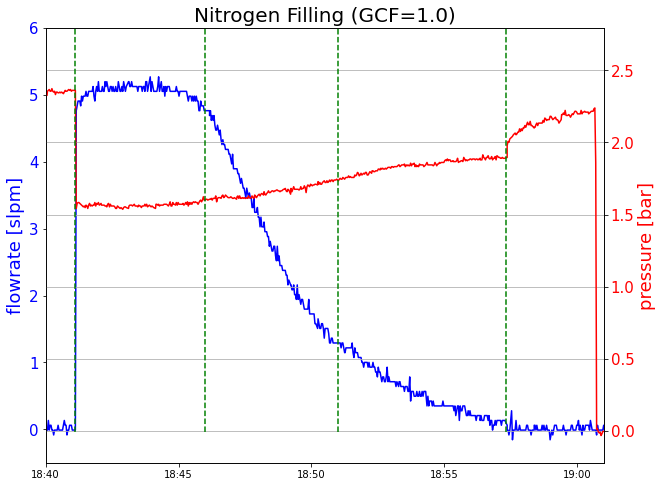

In [9]:
import datetime as dt

figure, ax = plt.subplots(figsize=(10, 8))

plt.plot(time_list, flowrate, color='blue')

#myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)

# Set X range. Using left and right variables makes it easy to change the range.
leftNi2 = dt.datetime(2021, 6, 7, 18, 40)
rightNi2 = dt.datetime(2021, 6, 7, 19,1)

plt.gca().set_xbound(leftNi2, rightNi2)
plt.ylim(-0.5,6)

ax.set_ylabel('flowrate [slpm]', color='blue', fontsize=18) 
plt.yticks(fontsize = 15, color='blue')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('pressure [bar]', color='red', fontsize=18)  # we already handled the x-label with ax1
ax2.plot(time_list, p_low, color='red')
myFmt = mdates.DateFormatter('%H:%M')
ax2.xaxis.set_major_formatter(myFmt)
plt.gca().set_xbound(leftNi2, rightNi2)
plt.yticks(fontsize = 15, color='red')

x_0 = dt.datetime(2021, 6, 7, 18, 41,7)
x_1 = dt.datetime(2021, 6, 7, 18, 46)
x_2 = dt.datetime(2021, 6, 7, 18, 51)
x_3 = dt.datetime(2021, 6, 7, 18,57,20)


plt.axvline(x_0, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')
plt.axvline(x_1, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')
plt.axvline(x_2, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')
plt.axvline(x_3, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')


plt.xlabel('time [s]',fontsize=18)
#plt.legend(loc='upper right')

plt.title('Nitrogen Filling (GCF=1.0)', fontsize = 20)

plt.grid()
plt.savefig("N2_filling_1.png")

plt.show()

In [10]:
print(f'Nitrogen result (GCF=1)')

result_ = []
result2_ = []
result3_ = []

print(f'First interval:')
result_ = integrated_flow(time_list, flowrate, x_0, x_1)
print(f'Second interval:')
result2_ = integrated_flow(time_list, flowrate, x_1, x_2)
print(f'Third interval:')
result3_ = integrated_flow(time_list, flowrate, x_2, x_3)
print(f'\nTot result')
tot_int_flow_ = result_ + result2_ + result3_
print(f'Integrated flow: {tot_int_flow_} SL')

mean_flow_ = mean_fl(time_list, flowrate, x_0, x_3)
print(f'Mean flow: {mean_flow_} slpm')

print(f'\nPressure results:')
p_ress_ = delta_p(time_list, flowrate, x_0, x_3, p_low)

Nitrogen result (GCF=1)
First interval:
Integrated flow: 24.234599999999993 SL
Second interval:
Integrated flow: 14.11696666666668 SL
Third interval:
Integrated flow: 3.507433333333326 SL

Tot result
Integrated flow: 41.858999999999995 SL
Mean flow: 2.617169456066943 slpm

Pressure results:
P end = 1.89 bar
delta_p is = 1.89 bar, considering that the p_start of the bottle is always = 0 bar


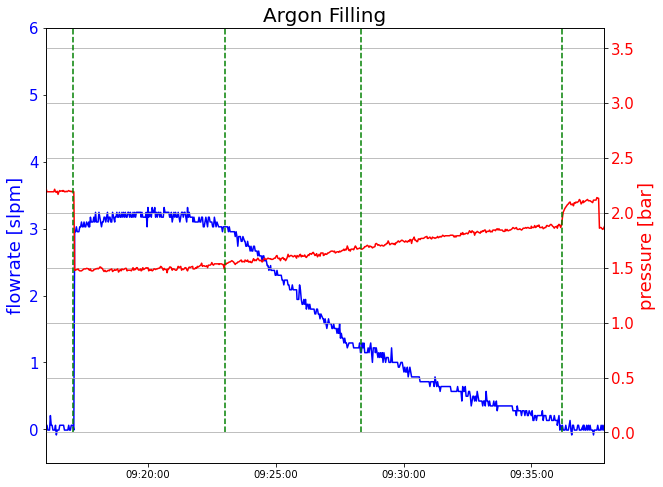

In [11]:
import datetime as dt

figure, ax = plt.subplots(figsize=(10, 8))

plt.plot(time_list2, flowrate2, color='blue')

#myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
myFmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(myFmt)

# Set X range. Using left and right variables makes it easy to change the range.
leftAr = dt.datetime(2021, 6, 8, 9, 16)
rightAr = dt.datetime(2021, 6, 8, 9,37,50)

plt.gca().set_xbound(leftAr, rightAr)
plt.ylim(-0.5,6)

ax.set_ylabel('flowrate [slpm]', color='blue', fontsize=18) 
plt.yticks(fontsize = 15, color='blue')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('pressure [bar]', color='red', fontsize=18)  # we already handled the x-label with ax1
ax2.plot(time_list2, p_low2, color='red')
myFmt = mdates.DateFormatter('%H:%M:%S')
ax2.xaxis.set_major_formatter(myFmt)
plt.gca().set_xbound(leftAr, rightAr)
plt.yticks(fontsize = 15, color='red')

x_0Ar = dt.datetime(2021, 6, 8, 9, 17,5)
x_1Ar = dt.datetime(2021, 6, 8, 9, 23)
x_2Ar = dt.datetime(2021, 6, 8, 9, 28,20)
x_3Ar = dt.datetime(2021, 6, 8, 9, 36,13)

plt.axvline(x_0Ar, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')
plt.axvline(x_1Ar, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')
plt.axvline(x_2Ar, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')
plt.axvline(x_3Ar, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')

plt.xlabel('time [s]',fontsize=18)
#plt.legend(loc='upper right',fontsize = '14')

plt.title('Argon Filling', fontsize = 20)

plt.grid()
plt.savefig("Argon_filling.png")

plt.show()

In [12]:
print(f'Argon result')

resultAr = []
result2Ar = []
result3Ar = []

print(f'First interval:')
resultAr = integrated_flow(time_list2, flowrate2, x_0Ar, x_1Ar)
print(f'Second interval:')
result2Ar = integrated_flow(time_list2, flowrate2, x_1Ar, x_2Ar)
print(f'Third interval:')
result3Ar = integrated_flow(time_list2, flowrate2, x_2Ar, x_3Ar)
print(f'\nTot result')
tot_int_flowAr = resultAr + result2Ar + result3Ar
print(f'Integrated flow: {tot_int_flowAr} SL')

mean_flowAr = mean_fl(time_list2, flowrate2, x_0Ar, x_3Ar)
print(f'Mean flow: {mean_flowAr} slpm')

print(f'\nPressure results:')
p_ressAr = delta_p(time_list2, flowrate2, x_0Ar, x_3Ar, p_low2)

Argon result
First interval:
Integrated flow: 18.16713333333344 SL
Second interval:
Integrated flow: 10.998033333333364 SL
Third interval:
Integrated flow: 4.550733333333333 SL

Tot result
Integrated flow: 33.71590000000013 SL
Mean flow: 1.7933989361702132 slpm

Pressure results:
P end = 1.954 bar
delta_p is = 1.954 bar, considering that the p_start of the bottle is always = 0 bar


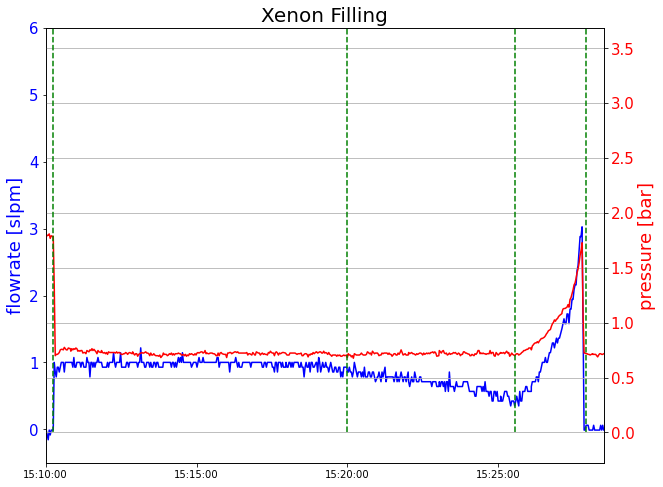

In [13]:
import datetime as dt

figure, ax = plt.subplots(figsize=(10, 8))

plt.plot(time_list2, flowrate2, color='blue')

#myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
myFmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(myFmt)

# Set X range. Using left and right variables makes it easy to change the range.
leftXe = dt.datetime(2021, 6, 8, 15, 10)
rightXe = dt.datetime(2021, 6, 8, 15, 28,30)

plt.gca().set_xbound(leftXe, rightXe)
plt.ylim(-0.5,6)

ax.set_ylabel('flowrate [slpm]', color='blue', fontsize=18) 
plt.yticks(fontsize = 15, color='blue')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('pressure [bar]', color='red', fontsize=18)  # we already handled the x-label with ax1
ax2.plot(time_list2, p_low2, color='red')
myFmt = mdates.DateFormatter('%H:%M:%S')
ax2.xaxis.set_major_formatter(myFmt)
plt.gca().set_xbound(leftXe, rightXe)
plt.yticks(fontsize = 15, color='red')

x_0Xe = dt.datetime(2021, 6, 8, 15, 10, 15)
x_1Xe = dt.datetime(2021, 6, 8, 15, 20)
x_2Xe = dt.datetime(2021, 6, 8, 15, 25,33)
x_3Xe = dt.datetime(2021, 6, 8, 15, 27,54)

plt.axvline(x_0Xe, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')
plt.axvline(x_1Xe, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')
plt.axvline(x_2Xe, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')
plt.axvline(x_3Xe, 0.07, 6, label='pyplot vertical line', color='green',linestyle='dashed')

plt.xlabel('time [s]',fontsize=18)
#plt.legend(loc='upper right',fontsize = '14')

plt.title('Xenon Filling', fontsize = 20)

plt.grid()
plt.savefig("Xe_filling.png")

plt.show()

In [14]:
print(f'Xenon result')

resultXe = []
result2Xe = []
result3Xe = []

print(f'First interval:')
resultXe = integrated_flow(time_list2, flowrate2, x_0Xe, x_1Xe)
print(f'Second interval:')
result2Xe = integrated_flow(time_list2, flowrate2, x_1Xe, x_2Xe)
print(f'Third interval:')
result3Xe = integrated_flow(time_list2, flowrate2, x_2Xe, x_3Xe)
print(f'\nTot result')
tot_int_flowXe = resultXe + result2Xe + result3Xe
print(f'Integrated flow: {tot_int_flowXe} SL')

mean_flowXe = mean_fl(time_list2, flowrate2, x_0Xe, x_3Xe)
print(f'Mean flow: {mean_flowXe} slpm')

print(f'\nPressure results:')
p_ressXe = delta_p(time_list2, flowrate2, x_0Xe, x_3Xe, p_low2)

Xenon result
First interval:
Integrated flow: 9.314599999999905 SL
Second interval:
Integrated flow: 3.79543333333332 SL
Third interval:
Integrated flow: 2.7922333333333342 SL

Tot result
Integrated flow: 15.902266666666558 SL
Mean flow: 0.9133608445297505 slpm

Pressure results:
P end = 0.723 bar
delta_p is = 0.723 bar, considering that the p_start of the bottle is always = 0 bar


In [16]:
df = pd.DataFrame()

flow_meter = [tot_int_flow, tot_int_flow_, tot_int_flowAr, tot_int_flowXe]
mean_flow_array = [mean_flowNi, mean_flow_, mean_flowAr, mean_flowXe]
meas = ['Nitrogen (GCF=1.383)', 'Nitrogen (GCF=1)', 'Argon (GCF=1)', 'XENON (GCF=1)']
start_pressure = 0
end_pressure = [p_ress[0], p_ress_[0], p_ressAr[0],p_ressXe[0]]
delta_p = [p_ress[1], p_ress_[1], p_ressAr[1],p_ressXe[1]]
bv = 16.0
flow_bv = [bv*p_ress[0], bv*p_ress_[0], bv*p_ressAr[0], bv*p_ressXe[0]] 

gcf = [flow_meter[0]/flow_bv[0], flow_meter[1]/flow_bv[1], flow_meter[2]/flow_bv[2], flow_meter[3]/flow_bv[3]]
       
       
df['Measurement'] = meas
df['Start pressure [bar]'] = start_pressure
df['End pressure [bar]'] = end_pressure
df['Delta p [bar]'] = delta_p
df['Flow meter [SL]'] = flow_meter
df['Buffer volumes [L]'] = bv
df['Flow Buffer volumes [SL]'] = flow_bv
df['GCF'] = gcf
df['Mean flow [slpm]'] = mean_flow_array

df

,Measurement,Start pressure [bar],End pressure [bar],Delta p [bar],Flow meter [SL],Buffer volumes [L],Flow Buffer volumes [SL],GCF,Mean flow [slpm]
0,Nitrogen (GCF=1.383),0,1.914,1.914,41.884616,16.0,30.624,1.367706,1.989990
1,Nitrogen (GCF=1),0,1.890,1.890,41.859000,16.0,30.240,1.384226,2.617169
2,Argon (GCF=1),0,1.954,1.954,33.715900,16.0,31.264,1.078426,1.793399
3,XENON (GCF=1),0,0.723,0.723,15.902267,16.0,11.568,1.374677,0.913361


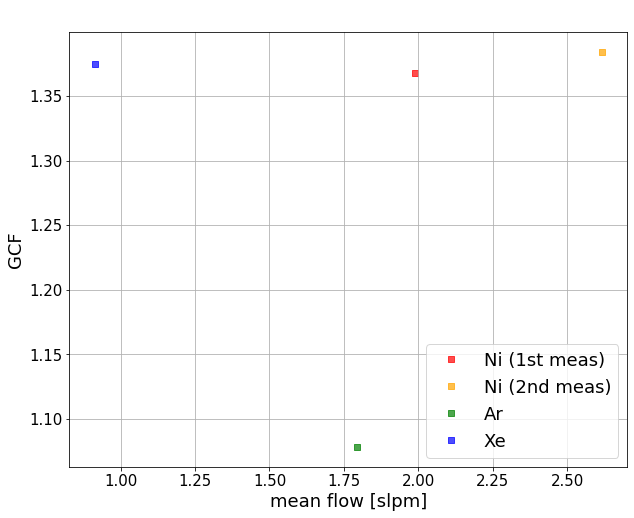

In [18]:
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize=(10, 8))

classes = ['Ni (1st meas)', 'Ni (2nd meas)', 'Ar', 'Xe']
values = [0, 1, 2, 3]
colours = ListedColormap(['red','orange','green','blue'])
scatter = plt.scatter(mean_flow_array, gcf,c=values, cmap=colours, marker='s', alpha=0.7)
plt.legend(handles=scatter.legend_elements()[0], labels=classes,loc='lower right',fontsize=18)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlabel('mean flow [slpm]',fontsize=18)
plt.ylabel('GCF',fontsize=18)

plt.title(' ', fontsize = 25)

ax.grid(True)

plt.savefig("cal_curve.png")
plt.show()